In [18]:
import os
import pandas as pd
import seaborn as sns 

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
Boston_crime_2019 = pd.read_csv("/Users/[editted]/Downloads/tmp9mkqyv6b.csv")
Boston_crime_2019.head()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,102091671,2647,NaN,THREATS TO DO BODILY HARM,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,NaN,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
1,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,NaN,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
2,102096818,2905,NaN,VAL - VIOLATION OF AUTO LAW,A1,,0,2019-11-30 21:00:00,2019,11,Saturday,21,NaN,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
3,129092894,3201,NaN,PROPERTY - LOST/ MISSING,NaN,503,0,2019-11-16 13:30:00,2019,11,Saturday,13,NaN,AMERICAN LEGION HWY,42.284467,-71.111831,"(42.28446742674232, -71.11183088758158)"
4,129099920,3301,NaN,VERBAL DISPUTE,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,NaN,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"


In [12]:
Boston_crime_2020 = pd.read_csv("/Users/[editted]/Downloads/script_113631134_20210423193017_combine.csv")
Boston_crime_2020.head()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2/20/20 0:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2/21/20 1:42,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,4/24/20 13:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,5/1/20 0:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,9/7/20 0:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [13]:
Boston_crime_combined_df = pd.concat([Boston_crime_2019, Boston_crime_2020])
Boston_crime_drop_null_df=Boston_crime_combined_df.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat','SHOOTING','OCCURRED_ON_DATE'])
Boston_crime_new_df=Boston_crime_drop_null_df.drop_duplicates(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat','SHOOTING','OCCURRED_ON_DATE'])
Boston_crime_new_df.to_csv('crimereport.csv', index=False)
Boston_crime_2019_2020_df = pd.read_csv('crimereport.csv', low_memory=False)

In [14]:
Boston_crime_2019_2020_df['offense_type'] = None
Boston_crime_2019_2020_df['offense_type'][Boston_crime_2019_2020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
Boston_crime_2019_2020_df['offense_type'][Boston_crime_2019_2020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
describe_by_offense = Boston_crime_2019_2020_df.groupby(['offense_type', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
print(describe_by_offense)

     offense_type  YEAR  INCIDENT_NUMBER
0  property crime  2019            13158
1  property crime  2020            12227
2   violent crime  2019             8324
3   violent crime  2020             5152


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
Boston_crime_2019_2020_df = Boston_crime_2019_2020_df[Boston_crime_2019_2020_df.DISTRICT != 'External']
total_by_district = Boston_crime_2019_2020_df.groupby(['YEAR', 'MONTH', 'DISTRICT','offense_type']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
Boston_violent_crime_df = total_by_district[total_by_district['offense_type'] == 'violent crime']
Boston_property_crime_df=total_by_district[total_by_district['offense_type'] == 'property crime']

Boston_violent_crime_2019_df= Boston_violent_crime_df[Boston_violent_crime_df['YEAR']==2019]
Boston_violent_crime_2020_df= Boston_violent_crime_df[Boston_violent_crime_df['YEAR']==2020]
Boston_property_crime_2019_df= Boston_property_crime_df[Boston_property_crime_df['YEAR']==2019]
Boston_property_crime_2019_months_df = Boston_property_crime_2019_df.loc[:, 'MONTH']
Boston_property_crime_2020_df= Boston_property_crime_df[Boston_property_crime_df['YEAR']==2020]

Boston_violent_crime_2019_df= Boston_violent_crime_2019_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
Boston_violent_crime_2020_df= Boston_violent_crime_2020_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
Boston_property_crime_2019_df= Boston_property_crime_2019_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})
Boston_property_crime_2020_df= Boston_property_crime_2020_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})

Boston_total_2019_df=Boston_violent_crime_2019_df.merge(Boston_property_crime_2019_df, how='left', left_on='DISTRICT', right_on='DISTRICT')
Boston_total_2020_df=Boston_violent_crime_2020_df.merge(Boston_property_crime_2020_df, how='left', left_on='DISTRICT', right_on='DISTRICT')

Boston_total_2019_2020_df=pd.concat([Boston_total_2019_df, Boston_total_2020_df])
print(Boston_total_2019_2020_df)

      YEAR_x  MONTH_x DISTRICT offense_type_x  violent_crimes  YEAR_y  \
0       2019        1       A1  violent crime              84    2019   
1       2019        1       A1  violent crime              84    2019   
2       2019        1       A1  violent crime              84    2019   
3       2019        1       A1  violent crime              84    2019   
4       2019        1       A1  violent crime              84    2019   
...      ...      ...      ...            ...             ...     ...   
1723    2020       12       E5  violent crime              10    2020   
1724    2020       12       E5  violent crime              10    2020   
1725    2020       12       E5  violent crime              10    2020   
1726    2020       12       E5  violent crime              10    2020   
1727    2020       12       E5  violent crime              10    2020   

      MONTH_y  offense_type_y  property_crimes  
0           1  property crime              134  
1           2  property c

In [41]:
Boston_property_crime_2019_df.head()

,YEAR,MONTH,DISTRICT,offense_type,property_crimes
0,2019,1,A1,property crime,134
2,2019,1,A15,property crime,13
4,2019,1,A7,property crime,30
6,2019,1,B2,property crime,151
8,2019,1,B3,property crime,75


In [40]:
Boston_property_crime_2019_months_df.head()

0    1
2    1
4    1
6    1
8    1
Name: MONTH, dtype: int64

Task 8.1: Create a bubble map for property crimes in Boston, 2019. Each bubble represents one property crime incident.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


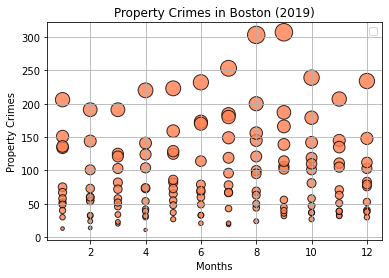

In [50]:
# Variable name: Boston_property_crime_2019_df
y = Boston_property_crime_2019_df['property_crimes'].to_list()
x = Boston_property_crime_2019_months_df.to_list()
s = [1*k for k in y]

# Build bubble map for property crimes in Boston (2019)
plt.scatter(x, y, s=s, c="coral", edgecolor="black", linewidths=1, alpha=0.8)
plt.title("Property Crimes in Boston (2019)")
plt.ylabel("Property Crimes")
plt.xlabel("Months")
plt.grid(True)

# Add the legend
plt.legend()

Task 8.2: Create another bubble map for violent crimes in Boston, 2019. Use a different map design (marker color, tile style, etc). 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


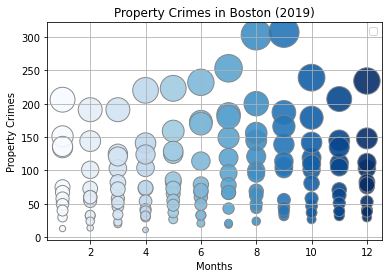

In [56]:
# Variable name: Boston_property_crime_2019_df
y = Boston_property_crime_2019_df['property_crimes'].to_list()
x = Boston_property_crime_2019_months_df.to_list()
s = [3*k for k in y]

# Build bubble map for property crimes in Boston (2019)
# Bubble size with "s"
# Transparency with "alpha"
# Color of bubbles with "c" and "cmap"
plt.scatter(x, y, s=s, c=x, cmap="Blues", edgecolor="grey", linewidths=1, alpha=0.9)
plt.title("Property Crimes in Boston (2019)")
plt.ylabel("Property Crimes")
plt.xlabel("Months")
plt.grid(True)

# Add the legend
plt.legend()

Task 8.3: Calculate zoning district-level violent vs. property crime counts. Use boston's zoning map from here (Links to an external site.) to map individual crime incidents to zoning district. Create a bubble map for these two sets of counts. There should be two sets of bubbles in your map. One set represents district-level violent crime counts, and the other set district-level property crime counts. These two bubble sets should be colored differently, but the size of the bubble for both sets should indicate the relative size of the crime count. Use each district’s centroid location to place their bubbles on the map. [Hint: in geopandas,  `gdf[“geometry”].centroid` returns the centroid point of the corresponding geometry.]